##  Important parts of the code are in "feature_extraction.py" and that's how I get the datasets I am using. 



# Final decision, Use TF-IDF and KNN to train the model

In [134]:
import pandas as pd

In [135]:
#saving data to files for later use
df = pd.read_csv('./data/X_train.csv')

In [136]:
#create the labels
train_labels = df[['Score']]

In [137]:
train_labels.to_csv("./data/Y_train.csv", index=False)

In [138]:
#Reading the files and implement them
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk
import pandas as pd
import numpy as np
import random
import time

trainX = pd.read_csv('./data/X_train.csv')
trainY = pd.read_csv('./data/Y_train.csv')
testX = pd.read_csv('./data/X_test.csv')

######Below is just for record######

# testX[['Summary']] = testX[['Summary']].fillna('')

# testX = testX[:30000]

# trainX = trainX[:10000]
# trainY = trainY[:10000]


# trainX['Context'] = trainX.apply(lambda x: str(x['ProductId']) + ' [SEP] ' + str(x['UserId']) + ' [SEP] ' + str(x['Summary']) + ' [SEP] ' + str(x['Text']), axis=1)
# trainY['Context'] = trainY.apply(lambda x: str(x['ProductId']) + ' [SEP] ' + str(x['UserId']) + ' [SEP] ' + str(x['Summary']) + ' [SEP] ' + str(x['Text']), axis=1)

# trainX['context'] = trainX.apply(lambda x: str(x['Summary']) + ' [SEP] ' + str(x['Text']), axis=1)
# testX['context'] = trainX.apply(lambda x:  str(x['Summary']) + ' [SEP] ' + str(x['Text']), axis=1)

# str(x['ProductId'])  + ' [SEP] ' + str(x['UserId']) + ' [SEP] ' +

# train_text = trainX['context'].values.tolist()
# test_text = testX['context'].values.tolist()
# context = train_text + test_text
# print(len(train_text), len(test_text))

In [139]:
#### Here is the where I set the subsets of the datasets and test for better solutions####

testX = testX
trainX = trainX[:50000]
trainY = trainY[:50000]

In [140]:
train_text = trainX['Context'].values.tolist()
test_text = testX['Context'].values.tolist()
context = train_text + test_text
print(len(train_text), len(test_text))
print(len(context))

50000 300000
350000


In [143]:
####vectorizer both train text and test text, consisting of summary and text columns from dataset####
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words = 'english',lowercase = True, ngram_range=(1, 2))

# sublinear_tf=True

features = vectorizer.fit_transform(context)
terms = vectorizer.get_feature_names()

train_reviews = features[:trainY.shape[0]]
train_labels = trainY.values.reshape((-1,))
test_reviews = features[trainY.shape[0]:]
test_id = testX['Id'].values

# temp = train_labels.dtype
# train_labels = train_labels.astype(int)




In [144]:
####Checking that our tfidf and feature extractions are working properly, and double check the shape of our sets####
print(train_reviews.shape)
print(test_reviews.shape)
print(train_labels.shape)
print(test_id.shape)
print("Class labels:", np.unique(train_labels))

(50000, 12082133)
(300000, 12082133)
(50000,)
(300000,)
Class labels: [1. 2. 3. 4. 5.]


In [ ]:
#Train KNN model and predict on whole test sets
knn = KNeighborsClassifier(n_neighbors=11)
model = knn.fit(train_reviews, train_labels)

result = model.predict(test_reviews)

submission = pd.DataFrame({"Id": test_id, "Score": result})
submission.to_csv("./data/submission.csv", index=False)


In [ ]:
submission.head()

In [ ]:
import time
time.ctime() # 'Mon Oct 18 13:35:29 2010'
time.strftime('%l:%M%p %Z on %b %d, %Y') # ' 1:36PM EDT on Oct 18, 2010'
time.strftime('%l:%M%p %z on %b %d, %Y') # ' 1:36PM EST on Oct 18, 2010'

# Local validation and parameter tunning
Below are the codes that I used for local validation. In this section, I used KFold on a small proportion of trainning set to select proper K in KNN model.

In [145]:
#split the data sets for Local validation and parameter tunning
from sklearn.model_selection import train_test_split
X_tn, X_tt, Y_tn, Y_tt = train_test_split(
        train_reviews, train_labels, test_size=1/5.0, random_state=1
    )

In [17]:
#store the accuracy of each iteration
#This is for testing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, accuracy_score
train_acc = []
test_acc = []


for i in range(1,21):
#     pca = PCA(n_components=1000)
    print('This is iter number ', i)
    knn = KNeighborsClassifier(n_neighbors=i)
#     model = make_pipeline(pca, knn)
    model = knn.fit(X_tn, Y_tn)
    
    Y_train_predictions = model.predict(X_tn)
    Y_test_predictions = model.predict(X_tt)
    
    acc_train = accuracy_score(Y_tn, Y_train_predictions)
    acc_test = accuracy_score(Y_tt, Y_test_predictions)
    
    train_acc.append(acc_train)
    test_acc.append(acc_test)

This is iter number  1
This is iter number  2
This is iter number  3
This is iter number  4
This is iter number  5
This is iter number  6
This is iter number  7
This is iter number  8
This is iter number  9
This is iter number  10
This is iter number  11
This is iter number  12
This is iter number  13
This is iter number  14
This is iter number  15
This is iter number  16
This is iter number  17
This is iter number  18
This is iter number  19
This is iter number  20


<function matplotlib.pyplot.show(close=None, block=None)>

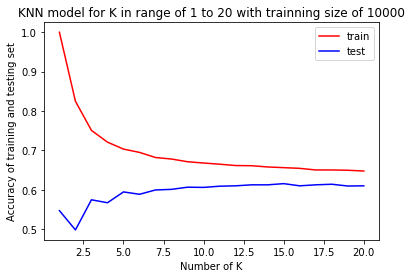

In [21]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
list_k = list(range(1,21))
plt.plot(list_k, train_acc, color='r', label='train')
plt.plot(list_k, test_acc, color='b', label='test')
plt.legend()
plt.xlabel("Number of K")
plt.ylabel("Accuracy of training and testing set")
plt.title("KNN model for K in range of 1 to 20 with trainning size of 10000")
plt.show

done!


<function matplotlib.pyplot.show(close=None, block=None)>

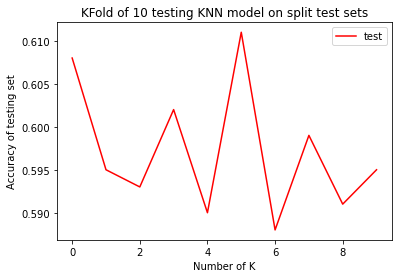

In [146]:
#Local validation for KNN using KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors=11)
model = knn.fit(X_tn, Y_tn)

cv_train_acc = []
    
cv_train_scores = cross_val_score(knn, X_tt, Y_tt, cv=10)
print('done!')
# cv_train_acc.append(np.mean(cv_train_scores))

list_k = list(range(10))
plt.plot(list_k, cv_train_scores, color='r', label='test')
plt.legend()
plt.xlabel("Number of K")
plt.ylabel("Accuracy of testing set")
plt.title("KFold of 10 testing KNN model on split test sets")
plt.show

# Below are the other option solution(SVM) I tried during exploration. 

In [118]:
trainX = pd.read_csv('./data/X_train.csv')
trainY = pd.read_csv('./data/Y_train.csv')
testX = pd.read_csv('./data/X_test.csv')

In [119]:
trainX = trainX[:500000]
trainY = trainY[:500000]

In [120]:
train_text = trainX['Context'].values.tolist()
test_text = testX['Context'].values.tolist()
context = train_text + test_text
print(len(train_text), len(test_text))
print(len(context))

500000 300000
800000


In [121]:
####vectorizer both train text and test text, consisting of summary and text columns from dataset####
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words = 'english',lowercase = True, ngram_range=(1, 2))


features = vectorizer.fit_transform(context)
terms = vectorizer.get_feature_names()

train_reviews = features[:trainY.shape[0]]
train_labels = trainY.values.reshape((-1,))
test_reviews = features[trainY.shape[0]:]
test_id = testX['Id'].values





In [122]:
from sklearn.model_selection import train_test_split
X_tn, X_tt, Y_tn, Y_tt = train_test_split(
        train_reviews, train_labels, test_size=1/5.0, random_state=1
    )

In [123]:
#Train SVM model and fit the data
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn import svm
# clf = SVC(probability=True, kernel='rbf') ###This is not the right model for large datasets
clf = svm.LinearSVC(loss='hinge')
clf.fit(X_tn, Y_tn)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(loss='hinge')

done!


<function matplotlib.pyplot.show(close=None, block=None)>

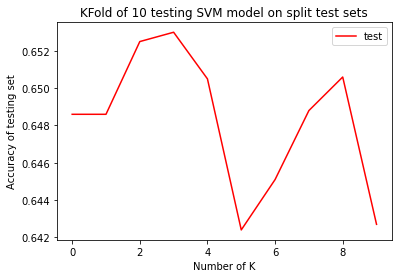

In [131]:
# KFold and trainsplit to get local validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

cv_train_acc = []
    
cv_train_scores = cross_val_score(clf, X_tt, Y_tt, cv=10)
print('done!')
# cv_train_acc.append(np.mean(cv_train_scores))

list_k = list(range(10))
plt.plot(list_k, cv_train_scores, color='r', label='test')
plt.legend()
plt.xlabel("Number of K")
plt.ylabel("Accuracy of testing set")
plt.title("KFold of 10 testing SVM model on split test sets")
plt.show

In [125]:
result = clf.predict(test_reviews)

In [126]:
submission = pd.DataFrame({"Id": test_id, "Score": result})

In [127]:
submission.head()

,Id,Score
0,5,5.0
1,11,4.0
2,17,4.0
3,46,5.0
4,47,2.0


In [128]:
submission.to_csv("./data/submission.csv", index=False)

In [129]:
time.ctime()
time.strftime('%l:%M%p %Z on %b %d, %Y')
time.strftime('%l:%M%p %z on %b %d, %Y')

' 3:17PM -0400 on Mar 23, 2022'